### Importation Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

### Reading File

In [3]:
import pandas as pd
data=pd.read_csv("D:\\project-Bi\\breast-cancer\\breast-cancer.csv",sep=';')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
573,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321
574,903554,B,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,...,13.56,25.80,88.33,559.5,0.1432,0.1773,0.1603,0.06266,0.3049,0.07081
575,8712729,M,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.14740,0.2810,0.07228


### First 5 rows

In [4]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Last 5 rows

In [5]:
data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
572,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
573,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321
574,903554,B,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,...,13.56,25.80,88.33,559.5,0.1432,0.1773,0.1603,0.06266,0.3049,0.07081
575,8712729,M,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.14740,0.2810,0.07228
576,859575,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589


### Shape of data

In [6]:
data.shape

(577, 32)

### Checking Null Values

In [7]:
data.isnull().sum()

id                         0
diagnosis                  2
radius_mean                0
texture_mean               1
perimeter_mean             0
area_mean                  0
smoothness_mean            2
compactness_mean           1
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          1
symmetry_se                0
fractal_dimension_se       1
radius_worst               0
texture_worst              0
perimeter_worst            1
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             1
fractal_dimension_worst    1
dtype: int64

Les données contiennent quelques valeurs manquantes dans plusieurs colonnes, principalement dans les colonnes diagnosis, smoothness_mean, et compactness_mean.

### Columns Available

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Data Types

In [9]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

la variable diagnosis joue un rôle important dans l analyse en tant que variable cible, contenant des informations qualitatives sur la nature bénigne ou maligne des tumeurs.

### Summary statistics of Dataframe

In [10]:
# returns a floating-point number rounded to 1
summary_stats=data.describe().round(1).transpose() 
summary_stats

,count,mean,std,min,25%,50%,75%,max
id,577.0,30121507.6,124209271.1,8670.0,869218.0,906290.0,8812877.0,911320502.0
radius_mean,577.0,14.1,3.5,7.0,11.7,13.4,16.0,28.1
texture_mean,576.0,19.3,4.4,0.0,16.2,18.8,21.8,39.3
perimeter_mean,577.0,92.1,24.2,43.8,75.3,86.6,104.7,188.5
area_mean,577.0,656.4,350.7,143.5,420.5,553.5,793.2,2501.0
smoothness_mean,575.0,0.1,0.0,0.0,0.1,0.1,0.1,0.2
compactness_mean,576.0,3.3,54.4,0.0,0.1,0.1,0.1,971.0
concavity_mean,577.0,0.1,0.1,0.0,0.0,0.1,0.1,0.4
concave points_mean,577.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2
symmetry_mean,577.0,0.2,0.0,0.0,0.2,0.2,0.2,0.3


### summary of the dataframe

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       577 non-null    int64  
 1   diagnosis                575 non-null    object 
 2   radius_mean              577 non-null    float64
 3   texture_mean             576 non-null    float64
 4   perimeter_mean           577 non-null    float64
 5   area_mean                577 non-null    float64
 6   smoothness_mean          575 non-null    float64
 7   compactness_mean         576 non-null    float64
 8   concavity_mean           577 non-null    float64
 9   concave points_mean      577 non-null    float64
 10  symmetry_mean            577 non-null    float64
 11  fractal_dimension_mean   577 non-null    float64
 12  radius_se                577 non-null    float64
 13  texture_se               577 non-null    float64
 14  perimeter_se             5

### Drop unnecessary column

In [12]:
data.drop(['id'],axis = 1,inplace = True)

La suppression de la colonne id implique que cette colonne n est pas jugée essentielle pour les tâches d analyse

In [38]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'value_type'],
      dtype='object')

### Replace with None in some colunms

In [14]:
#remplace NaN dans les colonnes spécifiées
data.loc[[10, 15], ['diagnosis', 'radius_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst']] = None
data[10: 15]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,None,NaN,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.6,781.0,0.00000,971.00000,0.12920,0.09954,0.06606,...,0.004144,20.42,27.28,136.5,1299.0000,0.1396,0.5609,0.39650,0.1810,0.37920
12,M,19.17,24.80,132.4,1123.0,0.09740,0.24580,0.20650,0.11180,0.23970,...,20.960000,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230
13,M,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.18470,...,16.840000,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
14,M,13.73,22.61,93.6,578.3,0.11310,0.22930,0.21280,0.08025,0.20690,...,15.030000,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310


Les valeurs NaN dans les colonnes radius_mean, symmetry_mean, ..., radius_worst, texture_worst, 
perimeter_worst, area_worst, smoothness_worst, compactness_worst indiquent des données manquantes ou non disponibles pour certains échantillon

### Replace NaN values with the mean of each column

In [15]:
columns_to_fill = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Calculate the mean only for the specified columns
mean_values = data[columns_to_fill].mean()

# Replace NaN values in the specified columns with their respective means
data[columns_to_fill] = data[columns_to_fill].fillna(mean_values)

data['diagnosis'] = data['diagnosis'].fillna('M')
data.head()
# the mean is very influenced by these extreme values than the correct method used to replace None in the Dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Les valeurs NaN dans les colonnes radius_mean, symmetry_mean, ..., radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst,
compactness_worst ont été remplacées par la moyenne de chaque colonne respective. Pour la colonne diagnosis, les valeurs manquantes ont été remplacées
par la valeur la plus fréquente (mode).

### Test For Null columns

In [16]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Replace NaN values with the median of each column

In [17]:
#remplacer les valeurs null par la median
columns_to_fill = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
data.loc[:, columns_to_fill].fillna(data[columns_to_fill].median())
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Sorts the items of a list in ascending

In [18]:
data = data.sort_values(by='radius_mean', ascending=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
539,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
568,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.184500,0.1829,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.6476,0.28670,0.2355,0.10510
352,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,...,33.130,23.58,229.30,3234.0,0.15300,0.59370,0.6451,0.27560,0.3690,0.08815
180,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,...,33.120,32.85,220.80,3216.0,0.14720,0.40340,0.5340,0.26880,0.2856,0.08082
461,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,...,36.040,31.37,251.20,4254.0,0.13570,0.42560,0.6833,0.26250,0.2641,0.07427


### To detect duplicates

In [19]:
data.duplicated().sum()

8

La méthode duplicated() dans pandas fournit 8 les lignes en double.

### To drop duplicates

In [20]:
data=data.drop_duplicates(data)

Les lignes en double ont été supprimées afin de garantir des résultats précis.

### Test

In [21]:
data.duplicated().sum()

0

In [22]:
data.diagnosis.value_counts()

diagnosis
B    356
M    213
Name: count, dtype: int64

La colonne diagnosis contient 356 échantillons étiquetés "B" (bénin) et 213 échantillons étiquetés "M" (malin).

### Mode value

In [23]:
data.fillna(data.mode()) 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
539,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
568,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.184500,0.1829,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.6476,0.28670,0.2355,0.10510
352,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,...,33.130,23.58,229.30,3234.0,0.15300,0.59370,0.6451,0.27560,0.3690,0.08815
180,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,...,33.120,32.85,220.80,3216.0,0.14720,0.40340,0.5340,0.26880,0.2856,0.08082
461,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,...,36.040,31.37,251.20,4254.0,0.13570,0.42560,0.6833,0.26250,0.2641,0.07427


### Create histograms for all columns

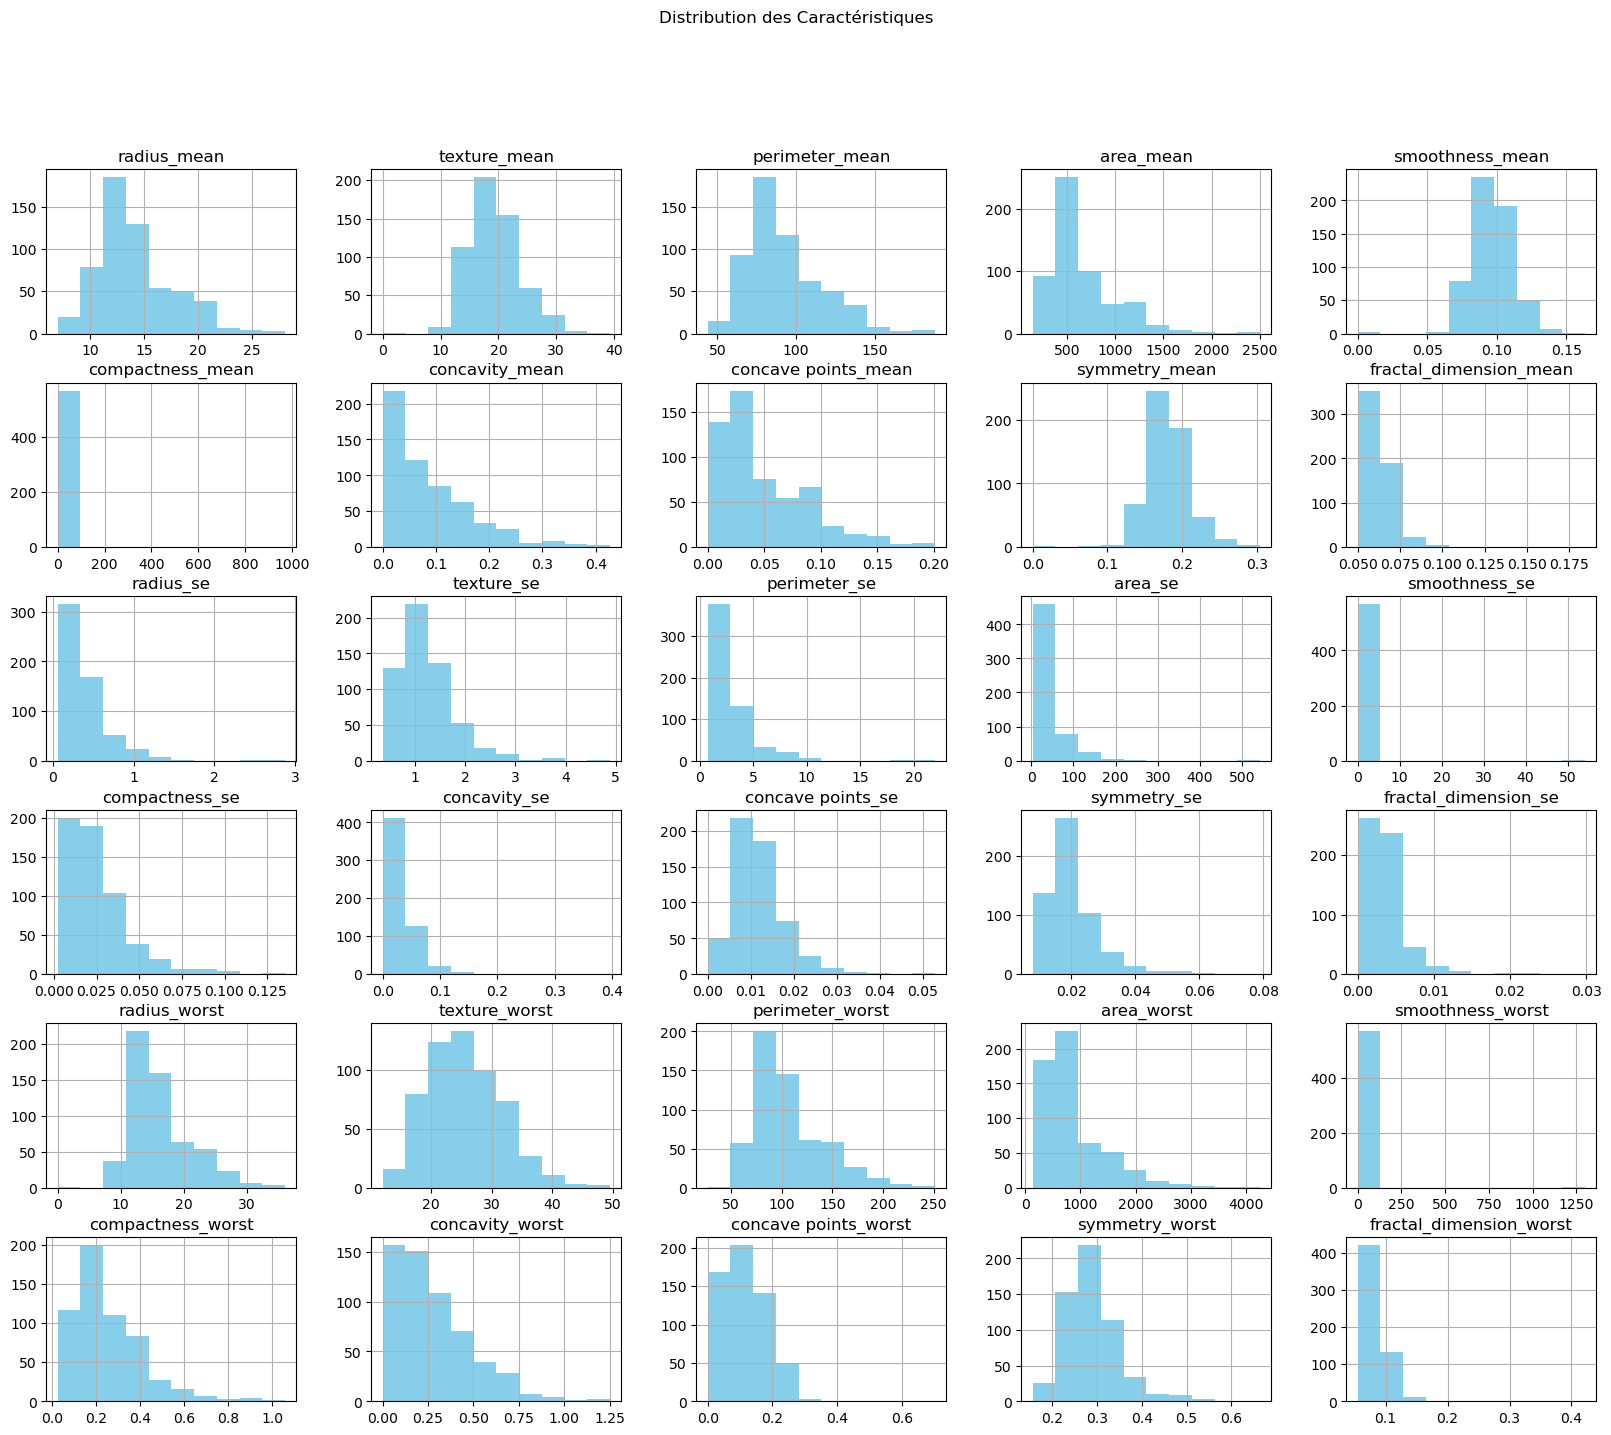

In [24]:
# Analyse de la distribution des caractéristiques
data.hist(figsize=(20, 16),color='skyblue')
plt.suptitle('Distribution des Caractéristiques')
plt.show()

### Calculate quartiles

In [25]:
# Calcul des quartiles
q25 = np.percentile(data.radius_mean, 25)
q75 = np.percentile(data.radius_mean, 75)

# Calcul de l'IQR
iqr = q75 - q25
print(iqr)

4.08


### Box plot to identify aberrant values and after changing

At least one outlier replaced with the median.


C:\Users\Salma\AppData\Local\Temp\ipykernel_8628\2903781118.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_type'] = 'Original'


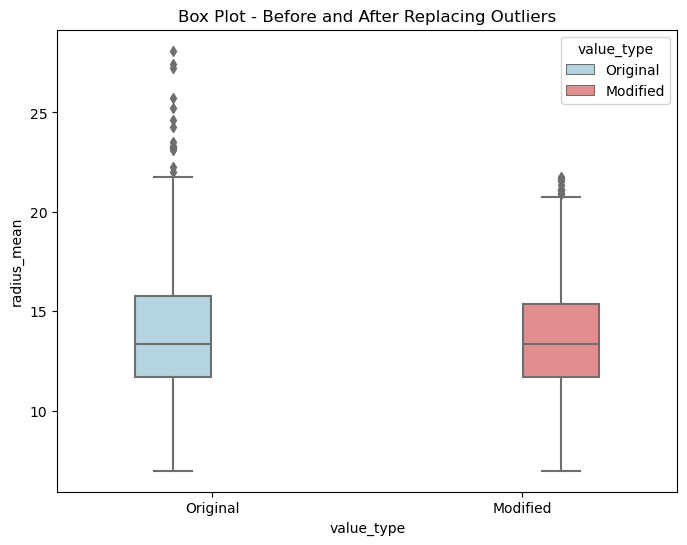

In [26]:
from scipy.stats import iqr

# Assuming 'radius_mean' is a column in your DataFrame named 'data'
# You might want to replace 'radius_mean' with the actual column name if it's different

# Calculate the IQR for 'radius_mean'
iqr_value = iqr(data['radius_mean'])
Borne_inf = q25 - iqr_value * 1.5
Borne_sup = q75 + iqr_value * 1.5

dfx_trans = data.copy()
remp = np.median(dfx_trans.radius_mean)

# Flag to check if any outliers are replaced
outlier_replaced = False

for i in dfx_trans.radius_mean:
    if i > Borne_sup or i < Borne_inf:
        dfx_trans.radius_mean = dfx_trans.radius_mean.replace(i, remp)
        outlier_replaced = True

# Print a message based on whether outliers are replaced or not
if outlier_replaced:
    print('At least one outlier replaced with the median.')
else:
    print('No outliers found.')

# Add a 'value_type' column to the data frames
dfx_trans['value_type'] = 'Modified'
data['value_type'] = 'Original'

# Combine both data frames for plotting
combined_data = pd.concat([data, dfx_trans], ignore_index=True)

# Create box plots for 'radius_mean' before and after replacing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='value_type', y='radius_mean', hue='value_type', data=combined_data, palette=['lightblue', 'lightcoral'], width=0.5)

plt.title('Box Plot - Before and After Replacing Outliers')
plt.ylabel('radius_mean')
plt.show()

### Group data by the 'diagnosis'

In [27]:
grouped_data = data.groupby('diagnosis')['radius_mean'].mean()
grouped_data

diagnosis
B    12.142188
M    17.434439
Name: radius_mean, dtype: float64

### Pie chart for diagnosis distribution

C:\Users\Salma\AppData\Local\Temp\ipykernel_8628\1002918905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diagnosis'] = data['diagnosis'].map({'M': 'malignant', 'B': 'benign'})


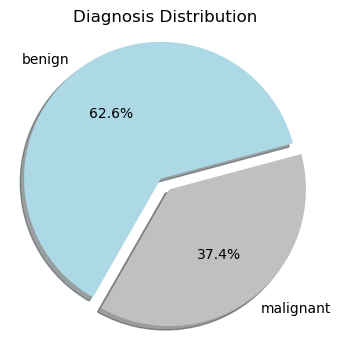

In [28]:
# Assuming 'diagnosis' is a column in your DataFrame named 'data'
# You might want to replace 'diagnosis' with the actual column name if it's different
data['diagnosis'] = data['diagnosis'].map({'M': 'malignant', 'B': 'benign'})

# Now, create a pie chart without explode
diagnosis_counts = data['diagnosis'].value_counts()
labels = diagnosis_counts.index  # Use unique values as labels
my_explode = (0, 0.1)
my_colors = ['lightblue', 'silver']

# Set a larger figure size to ensure the entire pie chart is visible
plt.figure(figsize=(4, 4))

# Create the pie chart
plt.pie(diagnosis_counts, labels=labels, colors=my_colors, explode=my_explode, autopct='%1.1f%%', startangle=15, shadow=True)

# Set the title and axis equal
plt.title('Diagnosis Distribution')
plt.axis('equal')

# Show the pie chart
%matplotlib inline
plt.show()


### Countplot for diagnosis

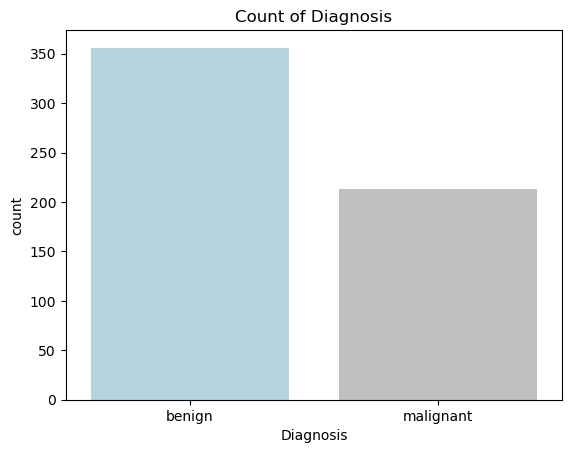

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called data with a column 'Diagnosis'
sns.countplot(x='diagnosis', data=data, palette=['lightblue','silver'])
plt.xlabel('Diagnosis')
plt.title('Count of Diagnosis')
plt.show()

### Splitting the data into training and test sets

In [40]:
# Extract features (X) and target variable (Y)

X = data.drop(['diagnosis', 'value_type'], axis=1)  # Make sure to adjust the columns based on your dataset
Y = data['diagnosis']

# Encode labels of the target variable
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.5, random_state=30)

En divisant les données en ensembles d'entraînement (50%) et de test (50%) avec un encodage des étiquettes de la variable cible

### Training a decision tree classifier

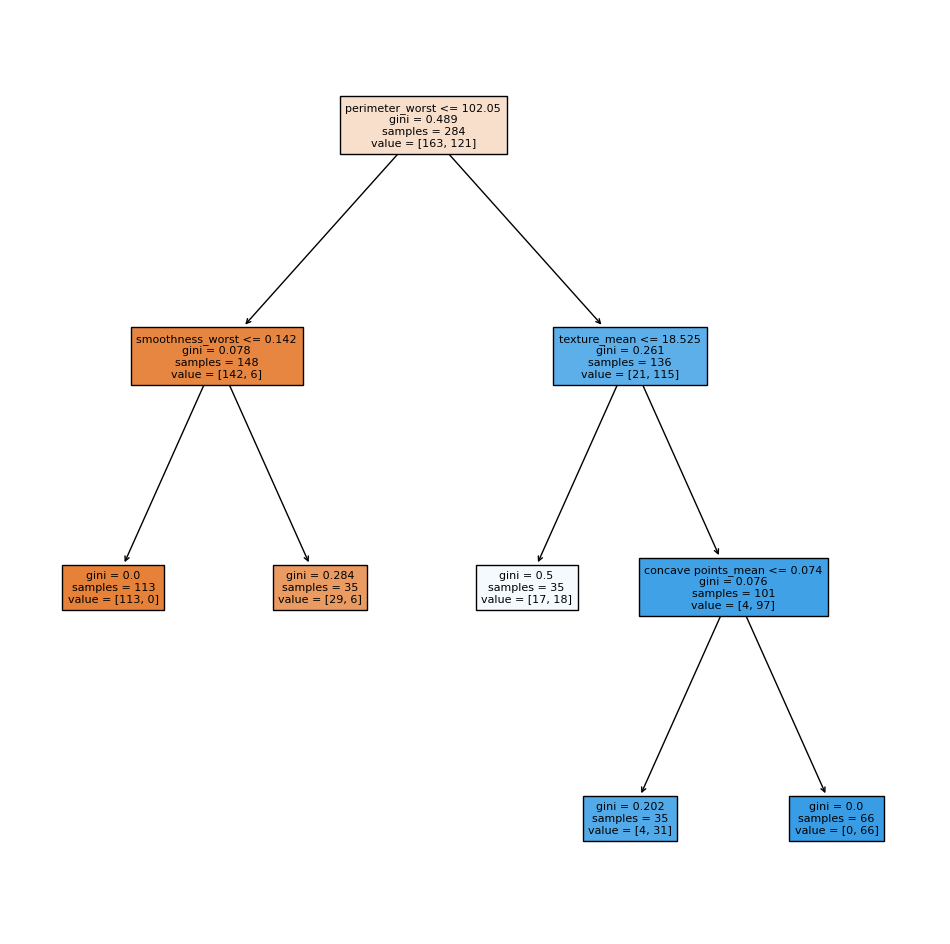

In [41]:
# Instantiate the decision tree
tree = DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=35)

# Train the model
tree.fit(X_train, Y_train)

# Adjust the figure size to display the tree in its entirety
plt.figure(figsize=(12, 12))

# Display the decision tree
plot_tree(tree, feature_names=list(X), filled=True, fontsize=8, max_depth=None)

# Show the plot
plt.show()

In [42]:
# Number of leaves (feuilles)
num_leaves = tree.get_n_leaves()

# Number of rules (règles)
num_rules = tree.tree_.node_count

# Depth of the tree (profondeur)
tree_depth = tree.get_depth()

# Display the results
print(f"Nombre de feuilles : {num_leaves}")
print(f"Nombre de règles : {num_rules}")
print(f"Profondeur de l'arbre : {tree_depth}")


Nombre de feuilles : 5
Nombre de règles : 9
Profondeur de l'arbre : 3


In [43]:
tree_rules= export_text(tree,feature_names=list(X))
print (tree_rules)

|--- perimeter_worst <= 102.05
|   |--- smoothness_worst <= 0.14
|   |   |--- class: 0
|   |--- smoothness_worst >  0.14
|   |   |--- class: 0
|--- perimeter_worst >  102.05
|   |--- texture_mean <= 18.52
|   |   |--- class: 1
|   |--- texture_mean >  18.52
|   |   |--- concave points_mean <= 0.07
|   |   |   |--- class: 1
|   |   |--- concave points_mean >  0.07
|   |   |   |--- class: 1



In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'arbre' is your trained decision tree classifier
predictions = tree.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate precision
precision = precision_score(Y_test, predictions)
print(f'Precision: {precision:.2f}')

# Evaluate recall
recall = recall_score(Y_test, predictions)
print(f'Recall: {recall:.2f}')

# Evaluate F1-score
f1 = f1_score(Y_test, predictions)
print(f'F1-Score: {f1:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.90
Precision: 0.78
Recall: 0.96
F1-Score: 0.86
Confusion Matrix:
[[168  25]
 [  4  88]]


Le modèle a montré une précision globale de 90%, ce qui signifie qu'il prédit correctement 90% des échantillons. Bien qu'il ait une précision de 78%, suggérant quelques faux positifs, le rappel de 96% indique une capacité élevée à détecter les vrais positifs.

Confusion Matrix:
[[168  25]
 [  4  88]]
Precision: 0.78


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

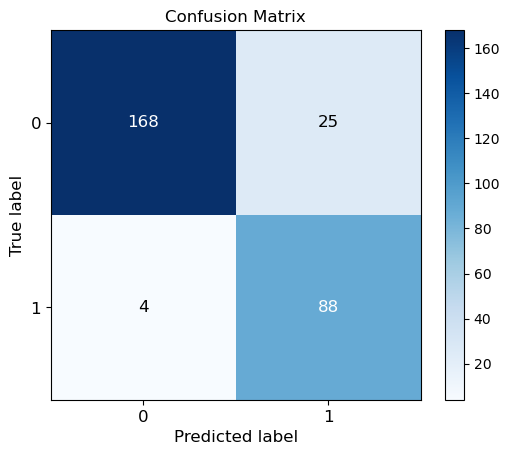

In [45]:
from sklearn.metrics import confusion_matrix, precision_score
import scikitplot as skplt

# Assuming 'arbre' is your trained decision tree classifier
predictions = tree.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Precision Score
precision = precision_score(Y_test, predictions)
print(f'Precision: {precision:.2f}')

# Plot Confusion Matrix with class labels
skplt.metrics.plot_confusion_matrix(Y_test, predictions, normalize=False, text_fontsize='large')


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Assumez que vous avez déjà divisé vos données en ensembles d'entraînement et de test (X_train, X_test, Y_train, Y_test)

# Instancier le modèle Naive Bayes
naive_bayes_model = GaussianNB()

# Entraîner le modèle
naive_bayes_model.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
predictions_nb = naive_bayes_model.predict(X_test)

# Afficher le rapport de classification
class_report_nb = classification_report(Y_test, predictions_nb)
print('Rapport de classification avec Naive Bayes:')
print("\n".join(class_report_nb.split('\n')))


Rapport de classification avec Naive Bayes:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       193
           1       0.97      0.80      0.88        92

    accuracy                           0.93       285
   macro avg       0.94      0.90      0.92       285
weighted avg       0.93      0.93      0.93       285



Taux de précision avec Naive Bayes: 0.93
Confusion Matrix:
[[191   2]
 [ 18  74]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

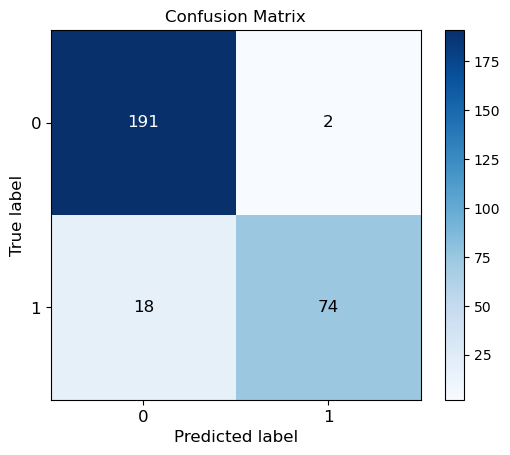

In [47]:
from sklearn.metrics import precision_score, confusion_matrix

# Calculer le score de précision
precision_nb = precision_score(Y_test, predictions_nb, average='weighted')

# Afficher le score de précision
print(f'Taux de précision avec Naive Bayes: {precision_nb:.2f}')

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, predictions_nb)

# Afficher la matrice de confusion
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix with class labels
skplt.metrics.plot_confusion_matrix(Y_test, predictions_nb, normalize=False, text_fontsize='large')


Le modèle Naive Bayes a affiché un taux de précision de 93%, ce qui indique une bonne performance globale dans la prédiction des classes. La matrice de confusion révèle que sur un total de 191 échantillons classés comme bénins, 2 étaient en réalité malins, et sur 92 échantillons classés comme malins, 18 étaient en réalité bénins.